# Finding and Visualizing Time Series Motifs of All Lengths using the Matrix Profile

## Import Some Packages

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import ipywidgets as widgets
from ipywidgets import interact, Layout
import stumpy

plt.style.use('stumpy.mplstyle')

## EOG Example

See [Figure 1](https://www.cs.ucr.edu/~eamonn/PAN_SKIMP%20%28Matrix%20Profile%20XX%29.pdf)

In [2]:
eog_df = pd.read_csv("https://zenodo.org/record/4733142/files/eog.csv?download=1")
m_250 = 250
m_500 = 500
mp_250 = stumpy.stump(eog_df["EOG"], m=m_250)
mp_500 = stumpy.stump(eog_df["EOG"], m=m_500)
motif_idx_250 = np.argmin(mp_250[:, 0])
motif_idx_500 = np.argmin(mp_500[:, 0])
nn_idx_250 = mp_250[motif_idx_250, 1]
nn_idx_500 = mp_500[motif_idx_500, 1]

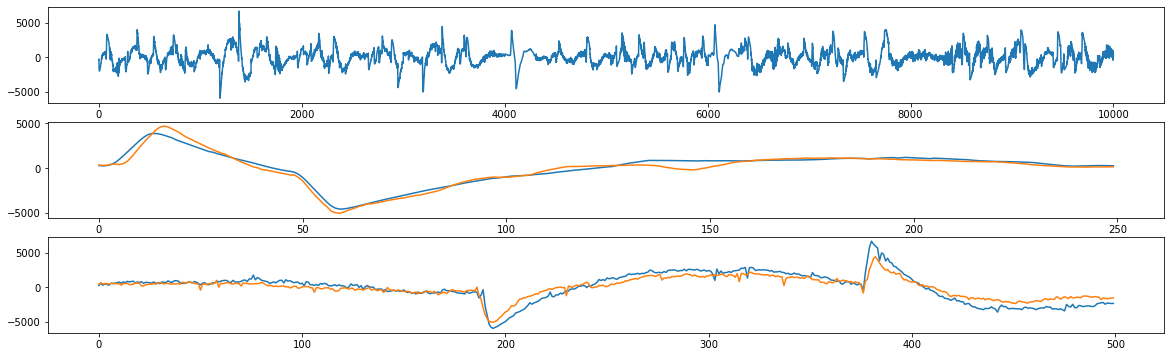

In [3]:
fig, axs = plt.subplots(3)
axs[0].plot(eog_df["EOG"].values)
axs[1].plot(np.arange(m_250), eog_df.iloc[motif_idx_250 : motif_idx_250 + m_250])
axs[1].plot(np.arange(m_250), eog_df.iloc[nn_idx_250 : nn_idx_250 + m_250])
axs[2].plot(np.arange(m_500), eog_df.iloc[motif_idx_500 : motif_idx_500 + m_500])
axs[2].plot(np.arange(m_500), eog_df.iloc[nn_idx_500 : nn_idx_500 + m_500])
plt.show()

## Compute the Pan Matrix Profile using STIMP

Essentially, `stumpy.stimp` implements [Table 2](https://www.cs.ucr.edu/~eamonn/PAN_SKIMP%20%28Matrix%20Profile%20XX%29.pdf). 

In [4]:
min_m, max_m = 100, 1000
eog = stumpy.stimp(eog_df["EOG"].values, min_m=min_m, max_m=max_m, percentage=0.01)  # This percentage controls the extent of `stumpy.scrump` completion
percent_m = 0.01  # The percentage of windows to compute
n = np.ceil((max_m - min_m) * percent_m).astype(int)
for _ in range(n):
    eog.update()

Above, we select a range of window sizes from `min_m = 3` to `max_m = 1000` and we arrange the windows in this range according to a breadth first order (this is done automatically by `stumpy.stimp` and see [slide 32](https://drive.google.com/file/d/1eT9oHOAKoi4oGkUX26V9aZIopov0Pxt5/view)) and/or [Section C](https://www.cs.ucr.edu/~eamonn/PAN_SKIMP%20%28Matrix%20Profile%20XX%29.pdf). The order of the window sizes to be processed can be found in `.M_` attribute:

In [5]:
eog.M_[:n]

array([550, 325, 776, 212, 438, 663, 889, 156, 269])

Notice that we don't compute the matrix profiles (approximated using `stumpy.scrump` at 1% and with `pre-scrump` turned on) for all of the window sizes and, instead, we select only 1% of the window sizes (`percent_m = 0.01`) for this task. So, only a total of `n` matrix profiles were computed. Now, let's plot our pan matrix profile along with the locations of our motif pairs (vertical red lines):

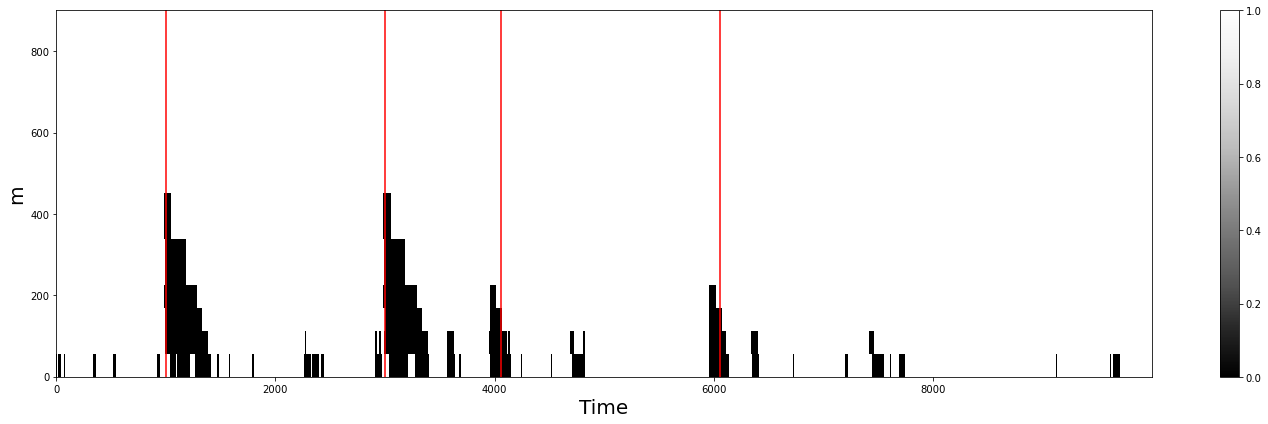

In [6]:
fig = plt.figure()
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

lines = [motif_idx_250, motif_idx_500, nn_idx_250, nn_idx_500]
color_map = cm.get_cmap("Greys_r", 256)
im = plt.imshow(eog.PAN_, cmap=color_map, origin="lower", interpolation="none", aspect="auto")
plt.xlabel("Time", fontsize="20")
plt.ylabel("m", fontsize="20")
plt.clim(0.0, 1.0)
plt.colorbar()
plt.tight_layout()

# Draw some vertical lines where each motif and nearest neighbor are located
if lines is not None:
    for line in lines:
        plt.axvline(x=line, color='red')

plt.show()

Now, we'll compute 2% more matrix profiles (for a total of 1% + 2% = 3%) for additional windows:

In [7]:
for _ in range(2 * n):
    eog.update()

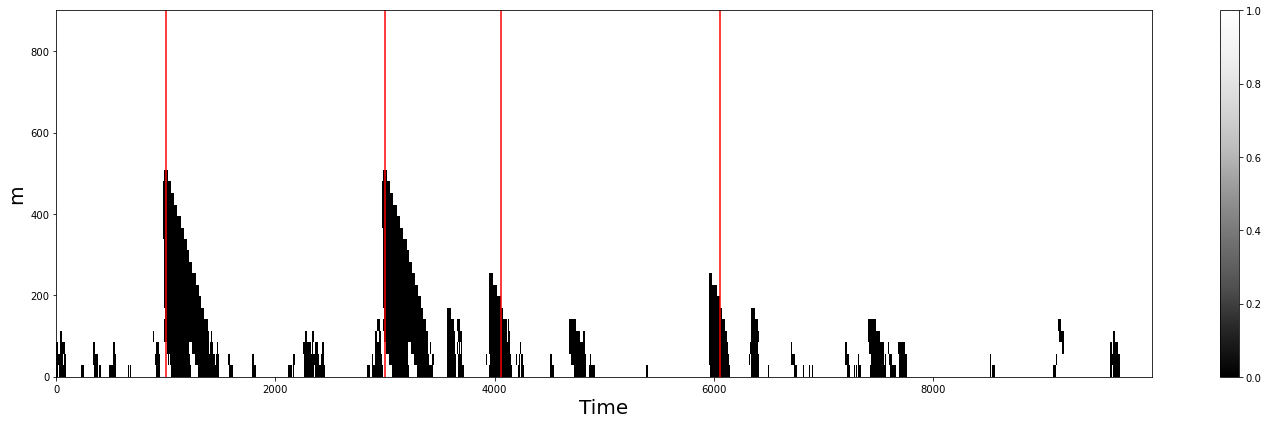

In [8]:
fig = plt.figure()
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

lines = [motif_idx_250, motif_idx_500, nn_idx_250, nn_idx_500]
color_map = cm.get_cmap("Greys_r", 256)
im = plt.imshow(eog.PAN_, cmap=color_map, origin="lower", interpolation="none", aspect="auto")
plt.xlabel("Time", fontsize="20")
plt.ylabel("m", fontsize="20")
plt.clim(0.0, 1.0)
plt.colorbar()
plt.tight_layout()

# Draw some vertical lines where each motif and nearest neighbor are located
if lines is not None:
    for line in lines:
        plt.axvline(x=line, color='red')

plt.show()

Notice how the pan matrix profile has become a bit clearer and a less "blocky"?

## Steamgen Example

In [9]:
steam_df = pd.read_csv("https://zenodo.org/record/4273921/files/STUMPY_Basics_steamgen.csv?download=1")
m = 640
mp = stumpy.stump(steam_df["steam flow"], m=m)
motif_idx = np.argmin(mp[:, 0])
nn_idx = mp[motif_idx, 1]

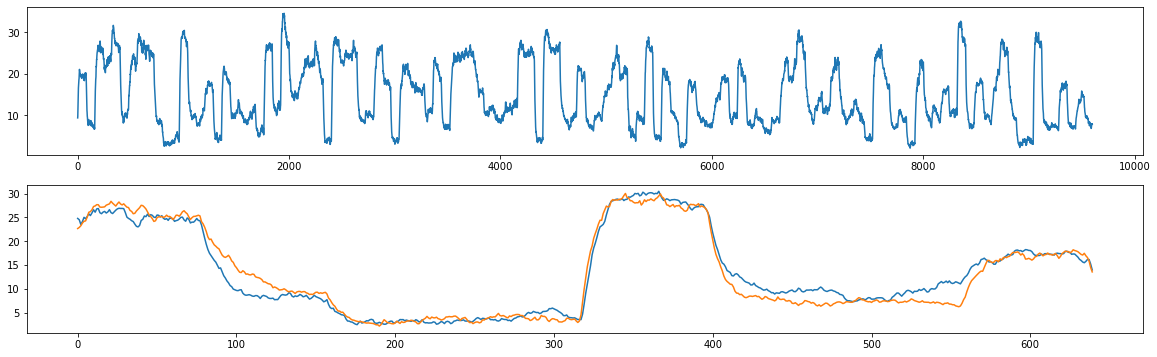

In [10]:
fig, axs = plt.subplots(2)
axs[0].plot(steam_df["steam flow"].values)
axs[1].plot(np.arange(m), steam_df["steam flow"].iloc[motif_idx : motif_idx + m])
axs[1].plot(np.arange(m), steam_df["steam flow"].iloc[nn_idx : nn_idx + m])
plt.show()

### Compute the Pan Matrix Profile using STIMP

In [11]:
min_m, max_m = 100, 3000
steam = stumpy.stimp(steam_df['steam flow'], min_m=min_m, max_m=max_m, percentage=0.01)  # This percentage controls the extent of `stumpy.scrump` completion
percent_m = 0.01  # The percentage of windows to compute
n = np.ceil((max_m - min_m) * percent_m).astype(int)
for _ in range(n):
    steam.update()

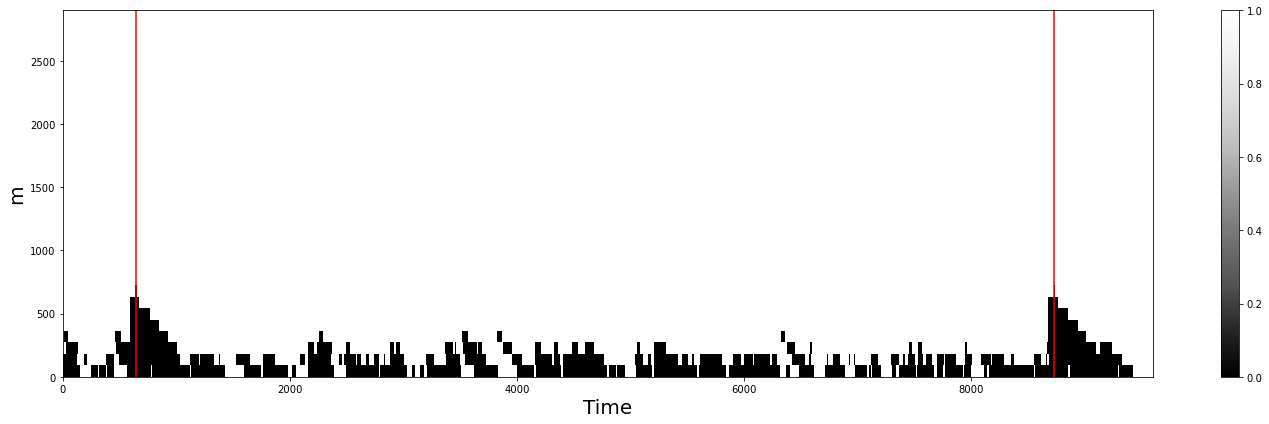

In [12]:
fig = plt.figure()
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

lines = [motif_idx, nn_idx]
color_map = cm.get_cmap("Greys_r", 256)
im = plt.imshow(steam.PAN_, cmap=color_map, origin="lower", interpolation="none", aspect="auto")
plt.xlabel("Time", fontsize="20")
plt.ylabel("m", fontsize="20")
plt.clim(0.0, 1.0)
plt.colorbar()
plt.tight_layout()

if lines is not None:
    for line in lines:
        plt.axvline(x=line, color='red')

plt.show()

In [13]:
for _ in range(2 * n):
    steam.update()

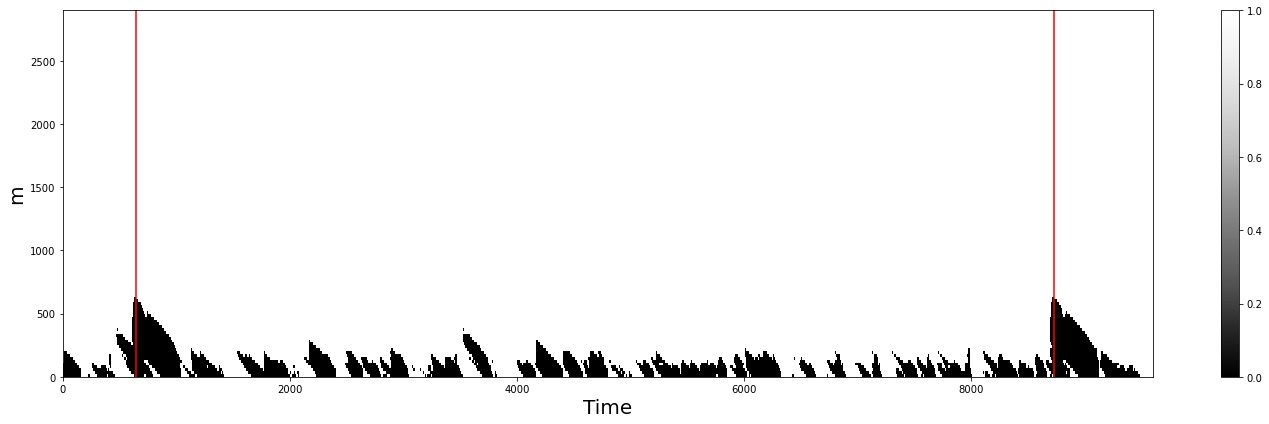

In [14]:
fig = plt.figure()
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

lines = [motif_idx, nn_idx]
color_map = cm.get_cmap("Greys_r", 256)
im = plt.imshow(steam.PAN_, cmap=color_map, origin="lower", interpolation="none", aspect="auto")
plt.xlabel("Time", fontsize="20")
plt.ylabel("m", fontsize="20")
plt.clim(0.0, 1.0)
plt.colorbar()
plt.tight_layout()

if lines is not None:
    for line in lines:
        plt.axvline(x=line, color='red')

plt.show()

## Bonus Section

In [15]:
%matplotlib widget
plt.style.use('stumpy.mplstyle')

plt.ioff()
fig = plt.figure()
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False

plt.ion()
ax = plt.gca()
ax.format_coord = lambda x, y: f'Time = {x:.0f}, m = {y:.0f}'
lines = [motif_idx, nn_idx]
color_map = cm.get_cmap("Greys_r", 256)
im = plt.imshow(steam.PAN_, cmap=color_map, origin="lower", interpolation="none", aspect="auto")
plt.xlabel("Time", fontsize="20")
plt.ylabel("m", fontsize="20")
plt.clim(0.0, 1.0)
plt.colorbar()
plt.tight_layout()

if lines is not None:
    for line in lines:
        plt.axvline(x=line, color='red')

def update_slider(change):
    PAN = steam.pan(threshold=change['new'])
    im.set_data(PAN)
    fig.canvas.draw_idle()
    
threshold = 0.2
slider = widgets.FloatSlider(value=threshold, min=0.0, max=1.0, step=0.01, readout_format='.2f', layout=Layout(width='80%'), description='Threshold:')
slider.observe(update_slider, names='value')
widgets.VBox([fig.canvas, slider])